In [ ]:
#HBN

In [44]:
import glob
import nibabel as nib
import numpy as np
import os
import cupy as cp
import pandas as pd
import re
import time
import seaborn as sns

In [2]:
fast_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.mgz'

In [3]:
frees_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [ ]:
!cat /usr/local/freesurfer/FreeSurferColorLUT.txt

In [4]:
table = '/usr/local/freesurfer/FreeSurferColorLUT.txt'

In [5]:
with open(table, 'r') as t:
    l = t.readlines()
    l= [i for i in l if re.search(r'^[0-9]', i)] # take each line starting with a number
    name_map = pd.DataFrame([' '.join(i.split()).split() for i in l])[[0,1]].set_index(1).to_dict()[0]
    num_map = pd.DataFrame([' '.join(i.split()).split() for i in l])[[0,1]].set_index(0).to_dict()[1]

In [6]:
subids = [i for i in os.listdir('/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer') if i.startswith('sub-')]
#subids                                                                                                        

In [7]:
f = fast_mask.format(subids[0])
img = nib.load(f)
arr = img.get_fdata()
roinums = np.unique(arr)


In [8]:
roinames = [num_map[str(int(i))] for i in roinums]

In [9]:
from joblib import Parallel, delayed


In [10]:
def dice(f1, f2,n):
    arr1 = nib.load(f1).get_fdata()
    arr2 = nib.load(f2).get_fdata()
    arr1 = np.where(arr1==n,1,0)
    arr2 = np.where(arr2==n,1,0)
    return (arr1 & arr2).sum()*2/(arr1.sum() + arr2.sum())

In [14]:
start = time.time()
d = dict()
for i in subids:
    try:
        d[i] = Parallel(n_jobs=25)(delayed(dice)(fast_mask.format(i),frees_mask.format(i),n) for n in roinums)
        print('made: ', i)
    except:
        print('skipped: ', i)
stop = time.time()
print(stop-start)
#748.1604852676392s

made:  sub-NDARCE721YB5
made:  sub-NDARME930DE7
skipped:  sub-NDARRU499DP2
made:  sub-NDARNH147WGN
made:  sub-NDARFW292PBD
made:  sub-NDARMT882AWE
skipped:  sub-NDARVV473XTY
made:  sub-NDARJM708VGE
made:  sub-NDAREG590BNY
made:  sub-NDARPW482TVE
made:  sub-NDARHM475DC5
made:  sub-NDARRK882CLT
made:  sub-NDARKL327VRH
skipped:  sub-NDARWC427JB2
skipped:  sub-NDARRZ199KNG
skipped:  sub-NDARUM569EV1
skipped:  sub-NDARUC356FCD
made:  sub-NDARMD575AXD
made:  sub-NDARLY114PDC
made:  sub-NDARLA516PH1
skipped:  sub-NDARWA544RDT
skipped:  sub-NDARZM903TNL
skipped:  sub-NDARTZ018PD5
made:  sub-NDARWR628EFJ
skipped:  sub-NDARYW789GNP
made:  sub-NDARNU249EDF
made:  sub-NDARFL411AT1
skipped:  sub-NDARUK719URM
skipped:  sub-NDARWK793VK4
made:  sub-NDARDJ825GBP
skipped:  sub-NDARWM656UWL
skipped:  sub-NDARYL272HDW
made:  sub-NDARRB338YZ0
skipped:  sub-NDARUG507AZX
made:  sub-NDARMJ333WJM
skipped:  sub-NDARZT772PU4
skipped:  sub-NDARMF508PA2
skipped:  sub-NDARTC527WPZ
made:  sub-NDARPJ151ERK
made:  sub

In [ ]:
# same with NORMDATA

In [21]:
#save
pd.DataFrame.from_dict(d).to_csv('DSCs.csv')

In [15]:
nfast_mask = '/home/orco/data/kinderseg/NORMDATA/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.mgz'
nfree_mask = '/home/orco/data/kinderseg/NORMDATA/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [16]:
subids = [i for i in os.listdir('/home/orco/data/kinderseg/NORMDATA') if i.startswith('sub-')]

In [18]:
subids

['sub-N030',
 'sub-N049',
 'sub-N130',
 'sub-N005',
 'sub-N116',
 'sub-N007',
 'sub-N117',
 'sub-N064',
 'sub-N110',
 'sub-N091',
 'sub-N081',
 'sub-N002',
 'sub-N071',
 'sub-N035',
 'sub-N137',
 'sub-N042',
 'sub-N074',
 'sub-N055',
 'sub-N058',
 'sub-N019',
 'sub-N086',
 'sub-N003',
 'sub-N078',
 'sub-N043',
 'sub-N053',
 'sub-N034',
 'sub-N106',
 'sub-N011',
 'sub-N093',
 'sub-N108',
 'sub-N125',
 'sub-N118',
 'sub-N080',
 'sub-N023',
 'sub-N090',
 'sub-N067',
 'sub-N016',
 'sub-N075',
 'sub-N135',
 'sub-N092',
 'sub-N004',
 'sub-N028',
 'sub-N121',
 'sub-N088',
 'sub-N085',
 'sub-N021',
 'sub-N018',
 'sub-N062',
 'sub-N136',
 'sub-N017',
 'sub-N061',
 'sub-N065',
 'sub-N112',
 'sub-N029',
 'sub-N015',
 'sub-N024',
 'sub-N033',
 'sub-N026',
 'sub-N020',
 'sub-N006',
 'sub-N109',
 'sub-N139',
 'sub-N038',
 'sub-N012',
 'sub-N083',
 'sub-N077',
 'sub-N129',
 'sub-N051',
 'sub-N054',
 'sub-N115',
 'sub-N059',
 'sub-N107',
 'sub-N126',
 'sub-N010',
 'sub-N048',
 'sub-N060',
 'sub-N128',

In [22]:
start = time.time()
dn = dict()
for i in subids:
    try:
        dn[i] = Parallel(n_jobs=25)(delayed(dice)(nfast_mask.format(i),nfree_mask.format(i),n) for n in roinums)
        print('made: ', i)
    except:
        print('skipped: ', i)
stop = time.time()
print(stop-start)
# 502.868745803833s

made:  sub-N030
made:  sub-N049
made:  sub-N130
made:  sub-N005
made:  sub-N116
made:  sub-N007
made:  sub-N117
made:  sub-N064
made:  sub-N110
made:  sub-N091
made:  sub-N081
made:  sub-N002
made:  sub-N071
made:  sub-N035
made:  sub-N137
made:  sub-N042
made:  sub-N074
made:  sub-N055
made:  sub-N058
made:  sub-N019
made:  sub-N086
made:  sub-N003
made:  sub-N078
made:  sub-N043
made:  sub-N053
made:  sub-N034
skipped:  sub-N106
made:  sub-N011
made:  sub-N093
made:  sub-N108
made:  sub-N125
made:  sub-N118
made:  sub-N080
made:  sub-N023
made:  sub-N090
made:  sub-N067
made:  sub-N016
made:  sub-N075
made:  sub-N135
made:  sub-N092
made:  sub-N004
made:  sub-N028
made:  sub-N121
made:  sub-N088
made:  sub-N085
made:  sub-N021
made:  sub-N018
made:  sub-N062
made:  sub-N136
made:  sub-N017
made:  sub-N061
made:  sub-N065
made:  sub-N112
made:  sub-N029
made:  sub-N015
made:  sub-N024
made:  sub-N033
made:  sub-N026
made:  sub-N020
made:  sub-N006
made:  sub-N109
made:  sub-N139
made:

In [ ]:
# Merge dictionaries

In [ ]:

d.update(dn)

In [35]:
df = pd.DataFrame.from_dict(d)
df.head()

,sub-NDARCE721YB5,sub-NDARME930DE7,sub-NDARNH147WGN,sub-NDARFW292PBD,sub-NDARMT882AWE,sub-NDARJM708VGE,sub-NDAREG590BNY,sub-NDARPW482TVE,sub-NDARHM475DC5,sub-NDARRK882CLT,...,sub-N132,sub-N036,sub-N063,sub-N014,sub-N039,sub-N052,sub-N050,sub-N069,sub-N041,sub-N032
0,0.998163,0.998371,0.998754,0.998818,0.998844,0.998834,0.997734,0.999061,0.998495,0.998513,...,0.998657,0.997647,0.997105,0.997986,0.997389,0.998069,0.997023,0.998706,0.997394,0.997412
1,0.964504,0.957297,0.961970,0.965199,0.954194,0.971303,0.948538,0.971856,0.954198,0.958124,...,0.960767,0.956678,0.965435,0.956124,0.947936,0.959112,0.951998,0.968409,0.954782,0.965847
2,0.890504,0.953943,0.936941,0.920570,0.854341,0.974848,0.901757,0.932060,0.925882,0.840628,...,0.963633,0.948051,0.864649,0.926804,0.948615,0.896130,0.911277,0.921297,0.910934,0.919587
3,0.633517,0.829346,0.806154,0.802339,0.414634,0.854466,0.651466,0.870406,0.725240,0.827839,...,0.870748,0.780234,0.654991,0.757225,0.857630,0.748387,0.765049,0.769231,0.829757,0.824519
4,0.893572,0.872146,0.899230,0.918008,0.893663,0.892860,0.888395,0.888440,0.882828,0.901653,...,0.839841,0.915734,0.877841,0.904123,0.841554,0.905136,0.908465,0.884555,0.878464,0.909883


In [36]:
df['roi'] = roinames

In [41]:
df = df.set_index(df.roi)

In [43]:
df.to_csv('DSCs.csv')

In [53]:
df.columns

Index(['sub-NDARCE721YB5', 'sub-NDARME930DE7', 'sub-NDARNH147WGN',
       'sub-NDARFW292PBD', 'sub-NDARMT882AWE', 'sub-NDARJM708VGE',
       'sub-NDAREG590BNY', 'sub-NDARPW482TVE', 'sub-NDARHM475DC5',
       'sub-NDARRK882CLT',
       ...
       'sub-N036', 'sub-N063', 'sub-N014', 'sub-N039', 'sub-N052', 'sub-N050',
       'sub-N069', 'sub-N041', 'sub-N032', 'roi'],
      dtype='object', length=208)

In [56]:
df_melted = pd.melt(df.drop(columns=['roi']).transpose().drop(columns=['Unknown']))

In [90]:
df_melted.columns = ['ROI', 'DSC']

In [91]:
df_melted.head()

,ROI,DSC
0,Left-Cerebral-White-Matter,0.964504
1,Left-Cerebral-White-Matter,0.957297
2,Left-Cerebral-White-Matter,0.961970
3,Left-Cerebral-White-Matter,0.965199
4,Left-Cerebral-White-Matter,0.954194


In [111]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'figure.autolayout': True,
                    'axes.labelsize': 25,
                    'axes.titlesize':25,
                    'xtick.labelsize':16,
                     'ytick.labelsize': 20})

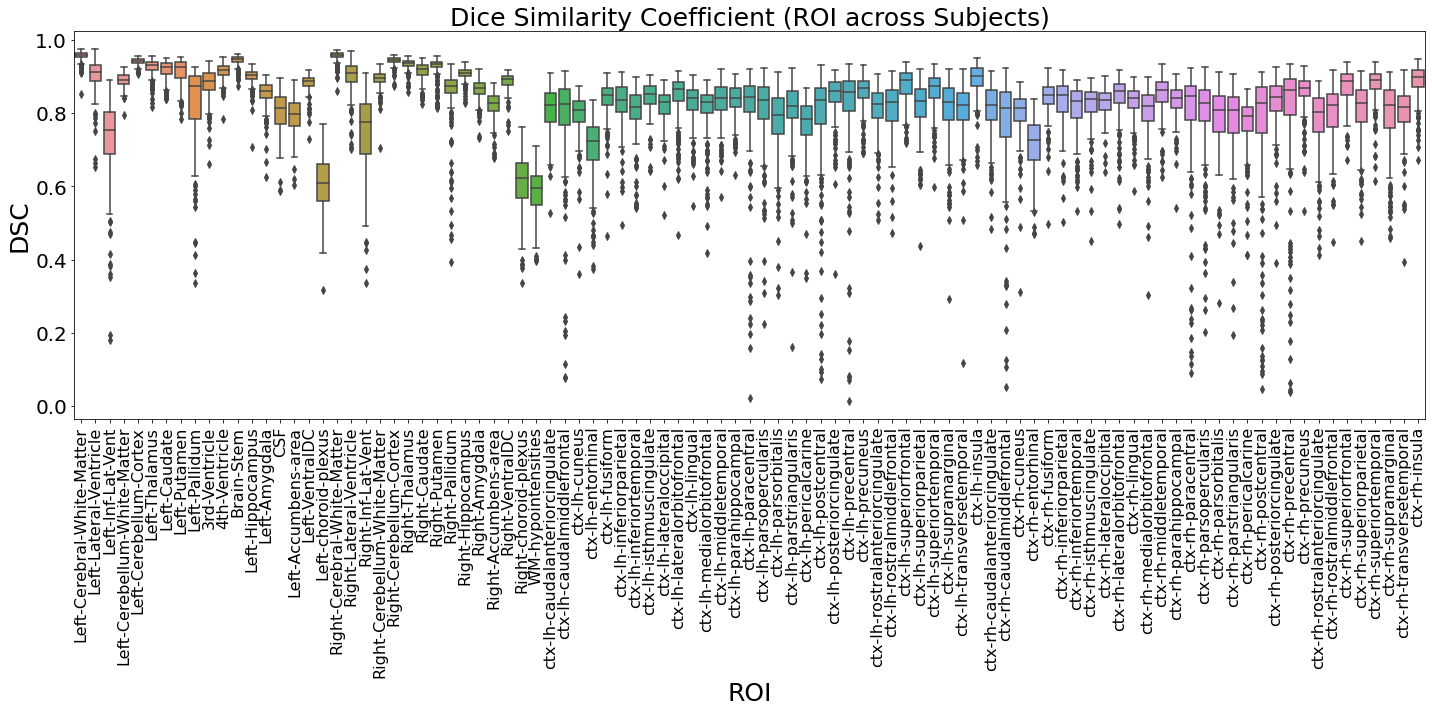

In [115]:
g = sns.boxplot(x='ROI', y='DSC', data=df_melted)
g.set_title('Dice Similarity Coefficient (ROI across Subjects)')
plt.setp(g.get_xticklabels(), rotation=90)
#plt.xlabel('ROI', fontsize=20)
#plt.ylabel('DSC', fontsize=20)
plt.tight_layout()
plt.savefig("DSCs.jpg", dpi=600)

In [ ]:
arr1 = nib.load(fast_mask.format(subids[0])).get_fdata()
arr2 = nib.load(fress_mask.format(subids[0])).get_fdata()

In [ ]:
n = roinums[5]

In [ ]:
arr1roi = np.where(arr1==n,1,0)
arr2roi = np.where(arr2==n,1,0)

In [ ]:
dice(arr1roi, arr2roi)

In [ ]:
np.unique(arr2roi)

In [ ]:
(arr1roi & arr2roi).sum()*2

In [ ]:
(arr1roi.sum()+ arr2roi.sum())

In [ ]:
(arr1roi & arr2roi).sum()*2/(arr1roi.sum()+ arr2roi.sum())

In [ ]:
start = time.time()
dsc = dice(arr1roi, arr2roi)
print(dsc)
stop = time.time()
print(stop-start)

In [ ]:
arr1 = np.where(arr==2010, 1,0)

In [ ]:
np.unique(arr1, return_counts=True)